# 미국 나스닥 데이터 분석
## 주제 : 확정
# 순서
0. 패키지불러오기<br>
1.데이터 프레임 작성<br>
-파일목록 다 들고오기<br>
-들고온 파일 목록을 읽어서 데이터 프레임<br>
-데이터 프레임 결합<br>
2.시계열 데이터 시각화<br>
3.시계열 데이터 분리<br>
4.증가률 예측

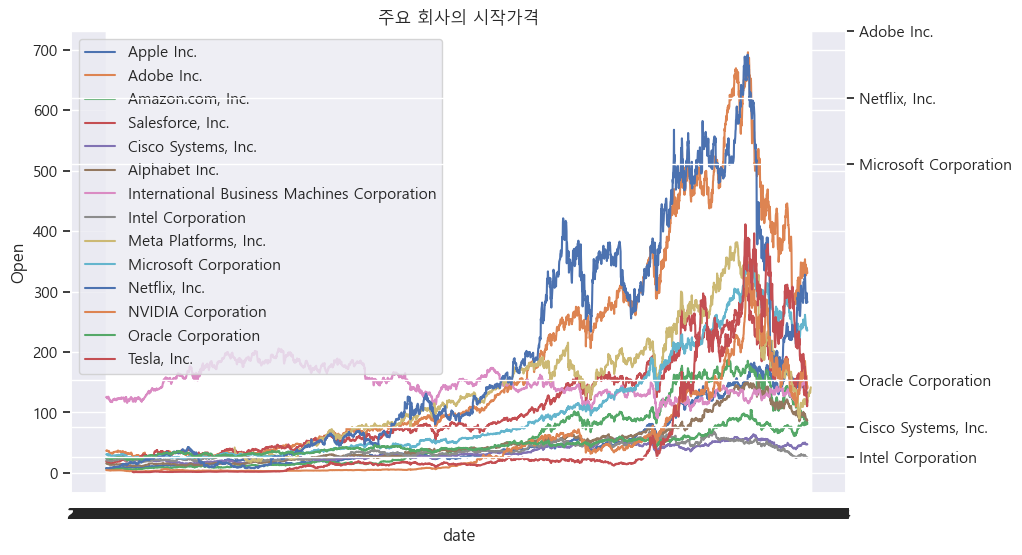

C:\Users\user\AppData\Local\Temp\ipykernel_14248\904861547.py:111: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


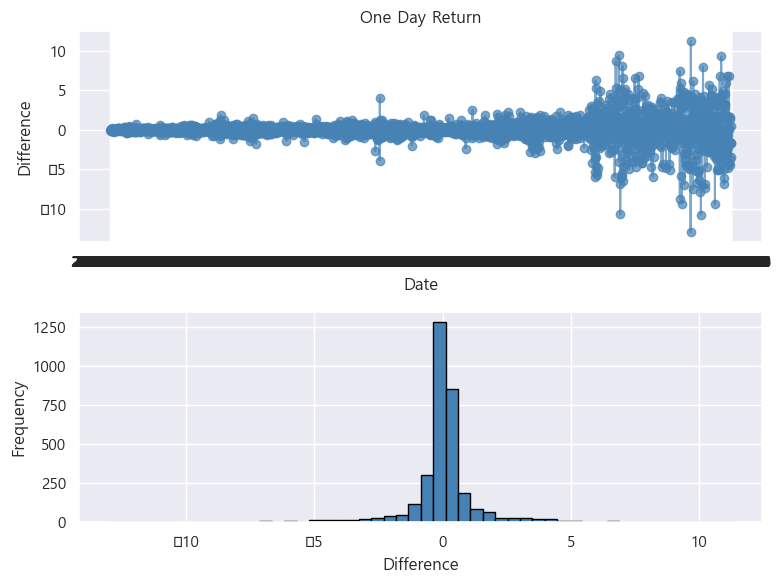

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic'

# 빈 DataFrame 생성
nasdaq = pd.DataFrame()

# 1. nasdaq_stock 폴더 내의 파일 목록 가져오기
datas = os.listdir("nasdaq_stock")

# 파일별로 반복하여 DataFrame에 추가하기
for data in datas:
    # 파일 읽어오기
    df = pd.read_csv(os.path.join("nasdaq_stock", data))
    # DataFrame 합치기
  
    name = data.replace(".csv","")
    df["name"] = name
    df = df.rename(columns=str.lower)
   
    nasdaq = pd.concat([nasdaq,df])
    

# 파일 목록 출력
df = pd.read_csv("nasdaq_stock_names.csv")
stocks = nasdaq.merge(df, left_on='name', right_on='stock_symbol')

stocks

# 시계열 데이터 시각화
end_labels = stocks.groupby('company').last().sort_values('open', ascending=False)[['open']].iloc[[0, 1, 2, 11, 12, 13]].reset_index()

plt.figure(figsize=(10, 6))
ax = plt.gca()
ax2 = ax.twinx()

for company in stocks['company'].unique():
    subset = stocks[stocks['company'] == company]
    ax.plot(subset['date'], subset['open'], label=company)

ax2.set_yticks(end_labels['open'])
ax2.set_yticklabels(end_labels['company'])

ax.set_yscale('linear')
ax.set_xlabel('date')
ax.set_ylabel('Open')
ax.set_title('주요 회사의 시작가격')
ax.legend(loc='upper left')

plt.show()

# sns.set(style='darkgrid')

# plt.figure(figsize=(10, 6))

# sns.lineplot(data=stocks, x='date', y='open', hue='company')

# ax2 = plt.gca().twinx()
# ax2.set_yticks(end_labels['open'])
# ax2.set_yticklabels(end_labels['company'])

# plt.yscale('linear')
# plt.xlabel('')
# plt.ylabel('Open')
# plt.title('주요 회사의 시작가격')
# plt.legend(loc='upper left')
# plt.show()

# # Separate line plots for top 3 and bottom 3 companies
# top3_companies = end_labels.iloc[:3, 1].tolist()
# bottom3_companies = end_labels.iloc[3:, 1].tolist()

# top3_stocks = stocks[stocks["company"].isin(top3_companies)]
# bottom3_stocks = stocks[stocks["company"].isin(bottom3_companies)]

# fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))
# for company in top3_companies:
#     top3_stocks[top3_stocks["company"] == company].plot(x="date", y="open", ax=ax1, label=company)
# ax1.legend(loc="upper left")
# ax1.set_title("Top 3")
# ax1.set_xlabel("")
# ax1.set_ylabel("Open")

# for company in bottom3_companies:
#     bottom3_stocks[bottom3_stocks["company"] == company].plot(x="date", y="open", ax=ax2, label=company)
# ax2.legend(loc="upper left")
# ax2.set_title("Bottom 3")
# ax2.set_xlabel("Date")
# ax2.set_ylabel("Open")

# plt.tight_layout()
# plt.show()


aapl = stocks[stocks["name"] == "AAPL"][["date", "open"]]
aapl["diff"] = aapl["open"].diff()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

ax1.plot(aapl["date"], aapl["diff"], color="steelblue", alpha=0.7, marker="o")
ax1.set_xlabel("Date")
ax1.set_ylabel("Difference")
ax1.set_title("One Day Return")

ax2.hist(aapl["diff"], bins=50, color="steelblue", edgecolor="black")
ax2.set_xlabel("Difference")
ax2.set_ylabel("Frequency")

plt.tight_layout()
plt.show()


